# PCA
The Principle component Analysis allows to extract principal components which form a orthogonal basis where individual dimensions are linearly uncorrelated. This method is commonly used to dimensionality reduction. 

The dataset has a total of 952 features. We will see how many dimensions we can remove from the dataset to train simpler our model.

In [21]:
# all import
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np

In [2]:
%reload_kedro

2022-01-22 18:12:26,343 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-01-22 18:12:26,363 - root - INFO - ** Kedro project proteins
2022-01-22 18:12:26,364 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-01-22 18:12:26,372 - root - INFO - Registered line magic `run_viz`


In [5]:
X = catalog.load("raw_X_train")

2022-01-22 18:13:19,908 - kedro.io.data_catalog - INFO - Loading data from `raw_X_train` (PickleDataSet)...


We must scale our data to apply the PCA method because it based on the [Spectral Theorem](https://en.wikipedia.org/wiki/Spectral_theorem) which tells us to find principal components, data have to be scaled to be diagonalized in the algorithm.

In [9]:
X_scaled = scale(X)

In [10]:
pca = PCA()
pca.fit(X_scaled)

PCA()

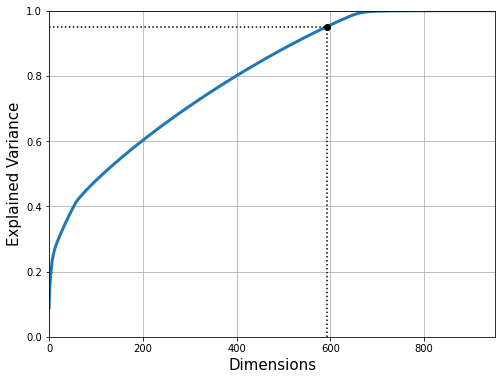

In [26]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
tol = 0.95
d = np.argmax(cumsum >= tol) + 1
plt.figure(figsize=(8, 6))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 952, 0, 1])
plt.xlabel("Dimensions", fontsize=15)
plt.ylabel("Explained Variance", fontsize=15)
plt.plot([d, d], [0, tol], "k:")
plt.plot([0, d], [tol, tol], "k:")
plt.plot(d, tol, "ko")
plt.grid(True)
plt.savefig("pca_reduction.png", dpi=120)
plt.show()

If we take a tolerance of 95%, that means we keep 95% of the information of our dataset, we have a little less 600 dimensions. In other words, we almost reduce dimensions by 37% !